In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv(r'E:\ML models\Bussiness sourced(Classification)\Train_pjb2QcD.csv')
test=pd.read_csv(r'E:\ML models\Bussiness sourced(Classification)\Test_wyCirpO.csv')

In [3]:
train_original=train.copy()
test_original=test.copy()

In [8]:
train.shape

(9527, 23)

In [9]:
test.shape

(5045, 22)

In [10]:
train.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [11]:
train.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [20]:
numfeatures = train.select_dtypes(include=[np.number])
numfeatures.columns

Index(['Office_PIN', 'Applicant_City_PIN', 'Manager_Grade',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [21]:
catfeatures = train.select_dtypes(include=[np.object])
catfeatures.columns

Index(['ID', 'Application_Receipt_Date', 'Applicant_Gender',
       'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Status', 'Manager_Gender', 'Manager_DoB'],
      dtype='object')

In [22]:
train['Business_Sourced'].value_counts()

0    6260
1    3267
Name: Business_Sourced, dtype: int64

In [23]:
train['Business_Sourced'].value_counts(normalize=True)

0    0.65708
1    0.34292
Name: Business_Sourced, dtype: float64

In [24]:
train['Business_Sourced'].value_counts()/train.shape[0]

0    0.65708
1    0.34292
Name: Business_Sourced, dtype: float64

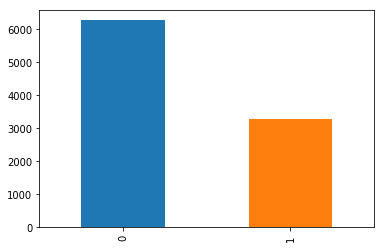

In [25]:
train['Business_Sourced'].value_counts().plot.bar()

In [28]:
catfeatures.apply(lambda x:len(x.unique()))

ID                             9527
Application_Receipt_Date        357
Applicant_Gender                  3
Applicant_BirthDate            5837
Applicant_Marital_Status          5
Applicant_Occupation              6
Applicant_Qualification          12
Manager_DOJ                     647
Manager_Joining_Designation       9
Manager_Current_Designation       6
Manager_Status                    3
Manager_Gender                    3
Manager_DoB                    1246
dtype: int64

In [29]:
train['Applicant_Gender'].value_counts(normalize=True)

M    0.758879
F    0.241121
Name: Applicant_Gender, dtype: float64

In [30]:
train['Applicant_Marital_Status'].value_counts(normalize=True)

M    0.653374
S    0.345568
W    0.000635
D    0.000423
Name: Applicant_Marital_Status, dtype: float64

In [31]:
train['Applicant_Occupation'].value_counts(normalize=True)

Salaried         0.455935
Business         0.277269
Others           0.236696
Self Employed    0.017939
Student          0.012160
Name: Applicant_Occupation, dtype: float64

In [32]:
train['Manager_Status'].value_counts(normalize=True)

Confirmation    0.596676
Probation       0.403324
Name: Manager_Status, dtype: float64

In [33]:
train['Manager_Gender'].value_counts(normalize=True)

M    0.862393
F    0.137607
Name: Manager_Gender, dtype: float64

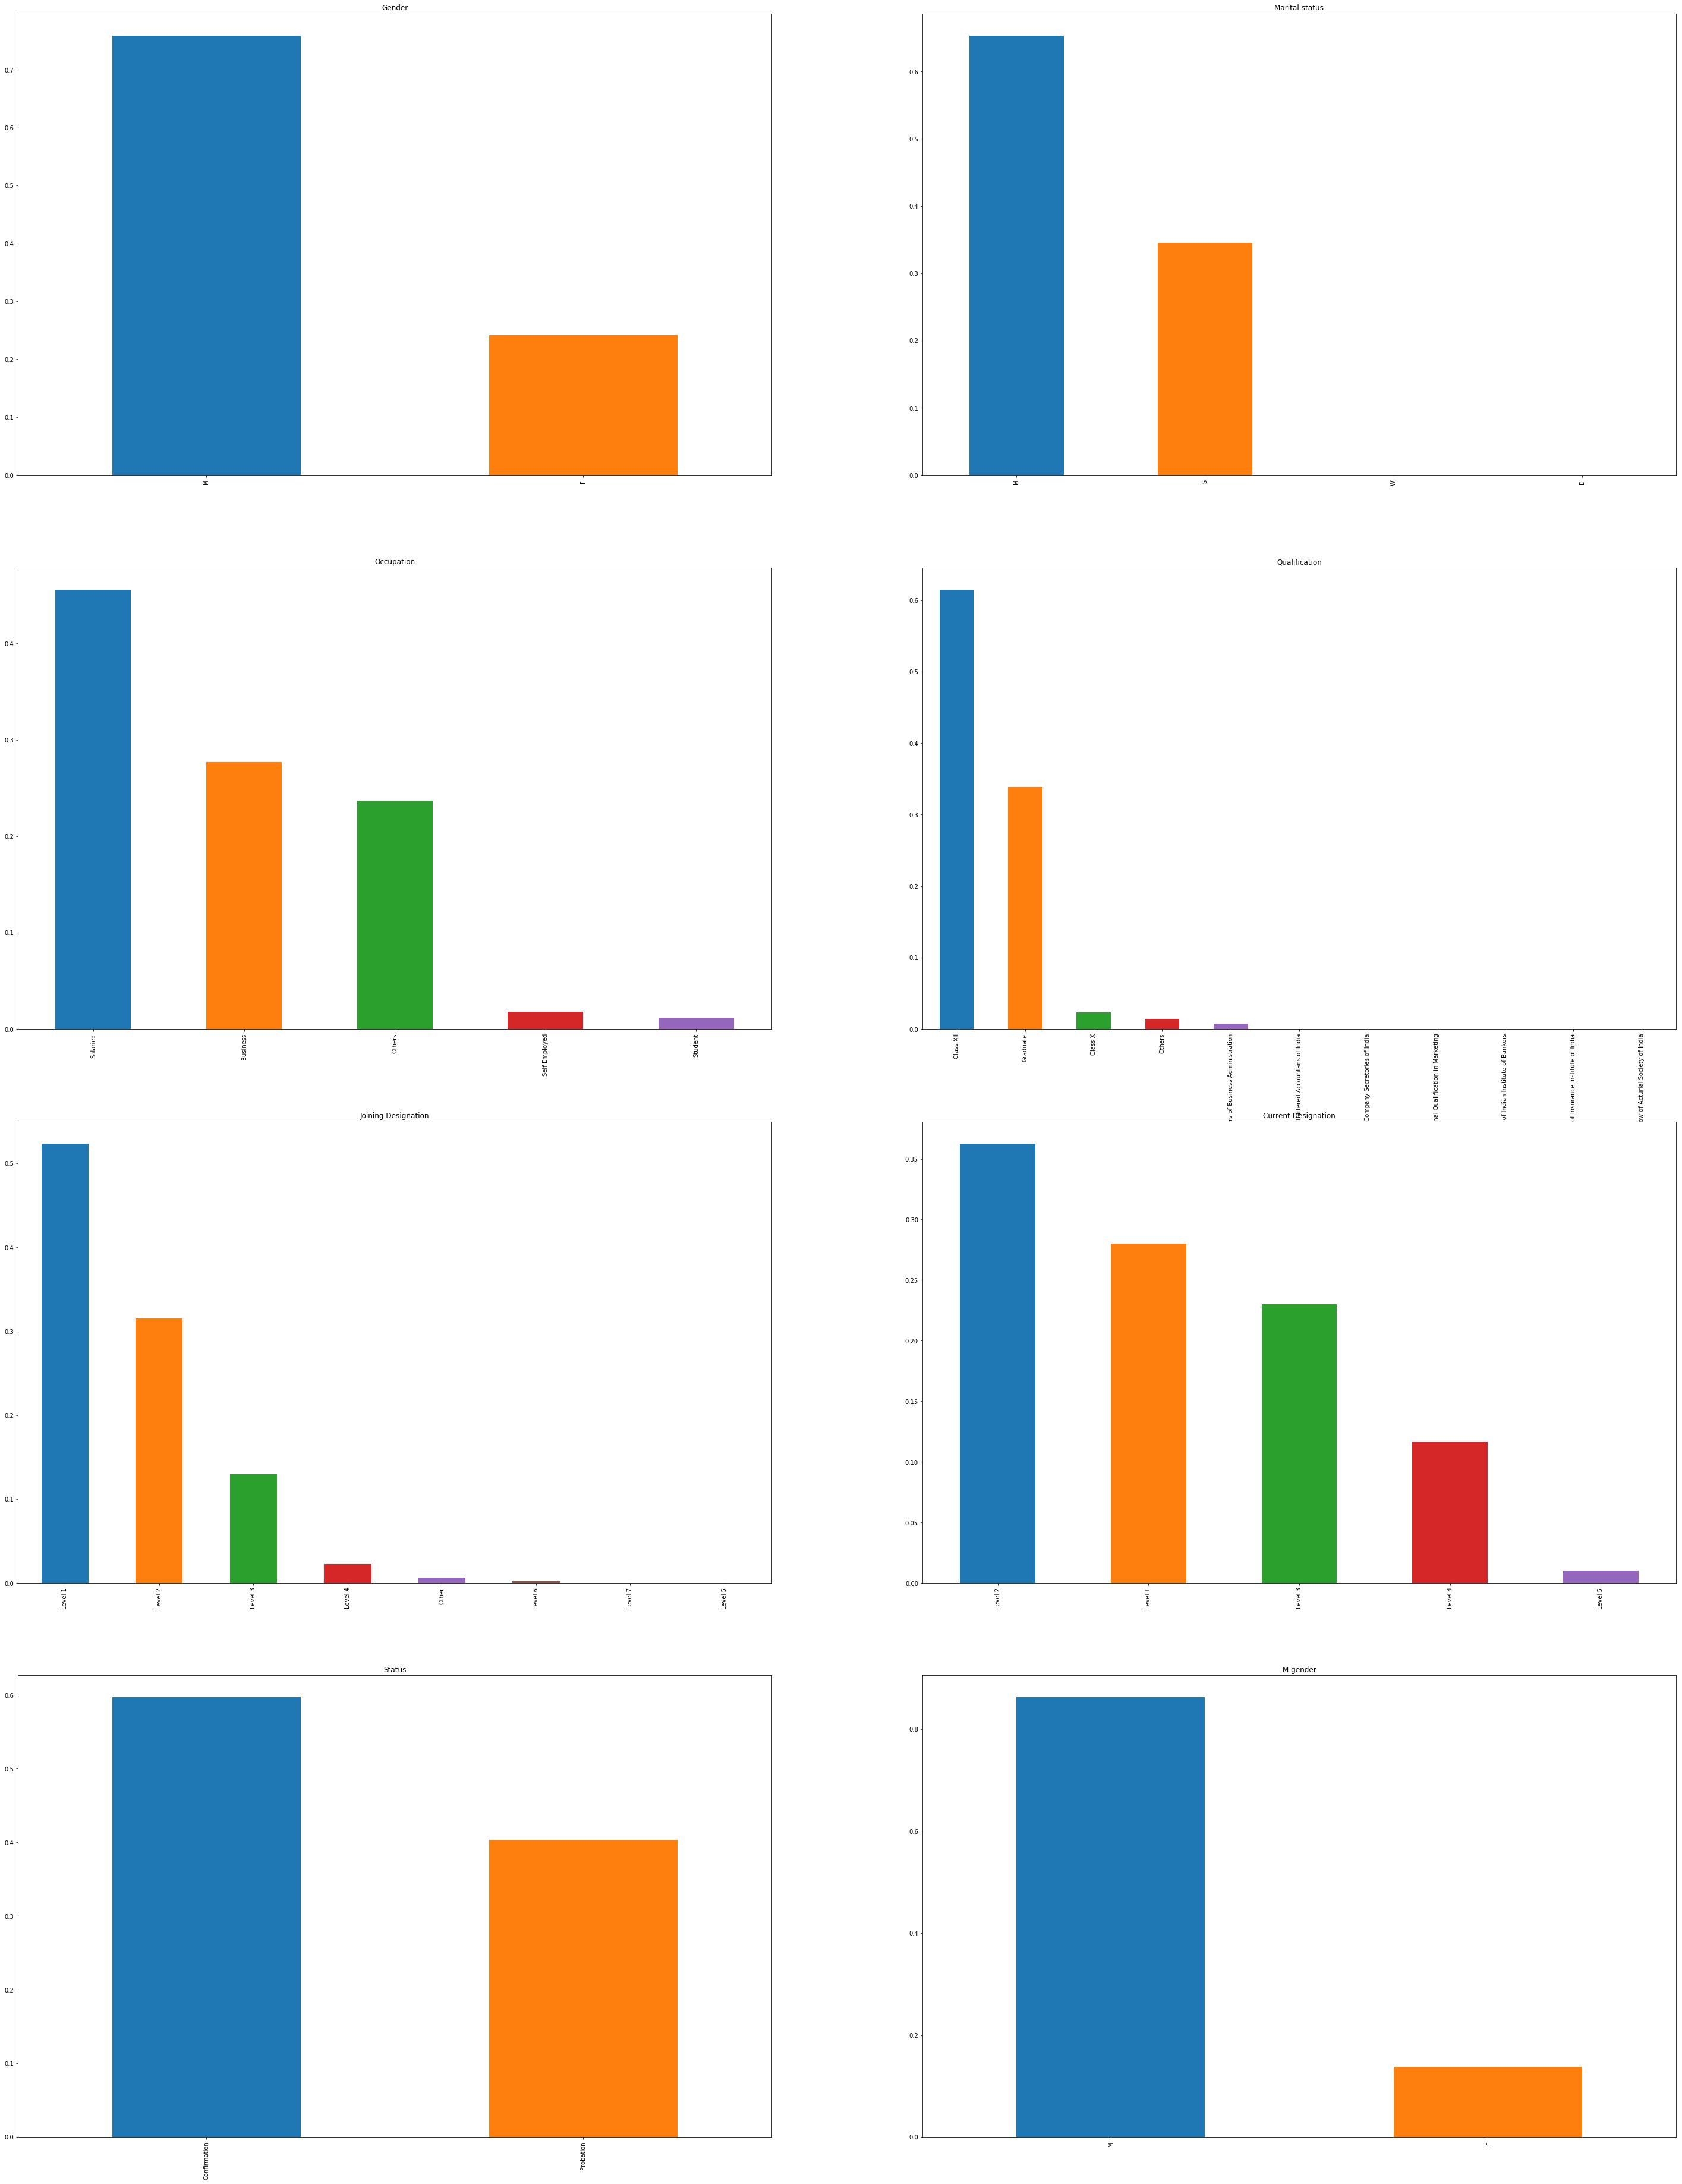

In [56]:
plt.figure(1)
plt.subplot(621)
train['Applicant_Gender'].value_counts(normalize=True).plot.bar(figsize=(50,100),title='Gender')

plt.subplot(622)
train['Applicant_Marital_Status'].value_counts(normalize=True).plot.bar(title='Marital status')

plt.subplot(623)
train['Applicant_Occupation'].value_counts(normalize=True).plot.bar(title='Occupation')

plt.subplot(624)
train['Applicant_Qualification'].value_counts(normalize=True).plot.bar(title='Qualification')

plt.subplot(625)
train['Manager_Joining_Designation'].value_counts(normalize=True).plot.bar(title='Joining Designation')

plt.subplot(626)
train['Manager_Current_Designation'].value_counts(normalize=True).plot.bar(title='Current Designation')

plt.subplot(627)
train['Manager_Status'].value_counts(normalize=True).plot.bar(title='Status')

plt.subplot(628)
train['Manager_Gender'].value_counts(normalize=True).plot.bar(title='M gender')

plt.show()

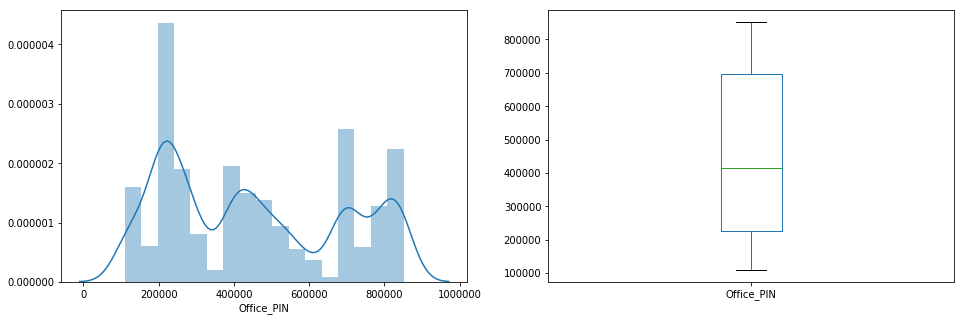

In [64]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Office_PIN']);

plt.subplot(122)
train['Office_PIN'].plot.box(figsize=(16,5))

plt.show()

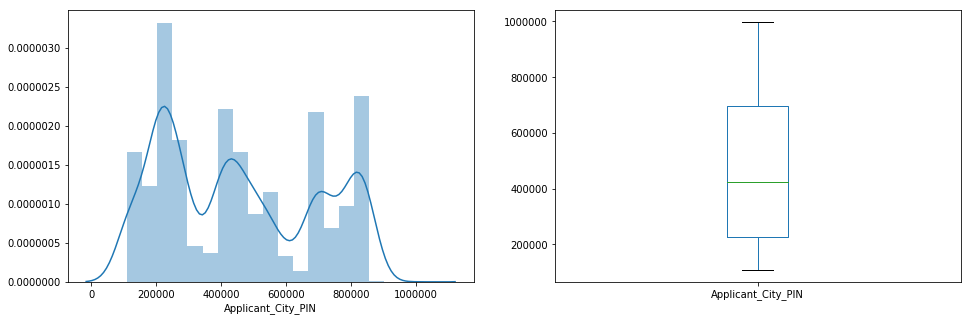

In [65]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Applicant_City_PIN']);

plt.subplot(122)
train['Applicant_City_PIN'].plot.box(figsize=(16,5))

plt.show()

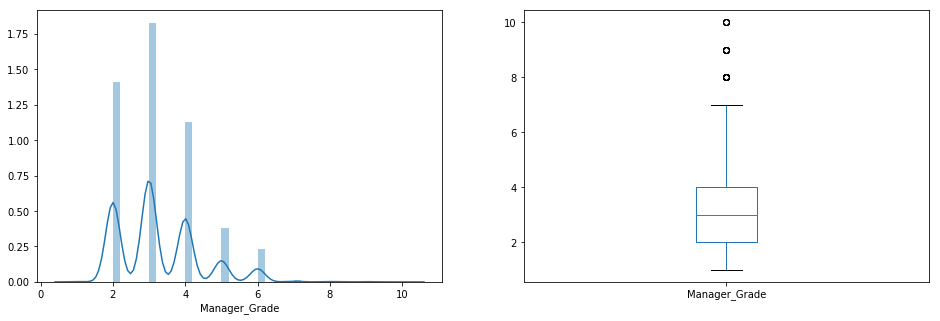

In [66]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Manager_Grade']);

plt.subplot(122)
train['Manager_Grade'].plot.box(figsize=(16,5))

plt.show()

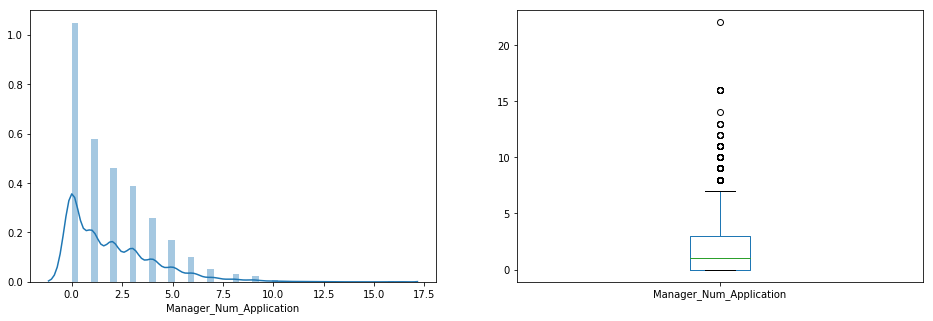

In [67]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Manager_Num_Application']);

plt.subplot(122)
train['Manager_Num_Application'].plot.box(figsize=(16,5))

plt.show()

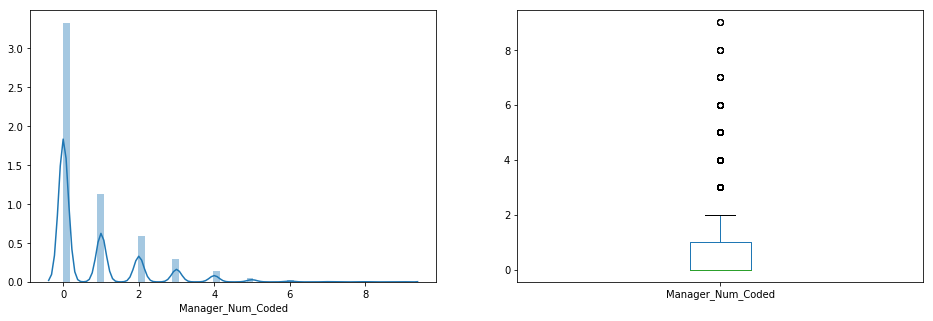

In [68]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Manager_Num_Coded']);

plt.subplot(122)
train['Manager_Num_Coded'].plot.box(figsize=(16,5))

plt.show()

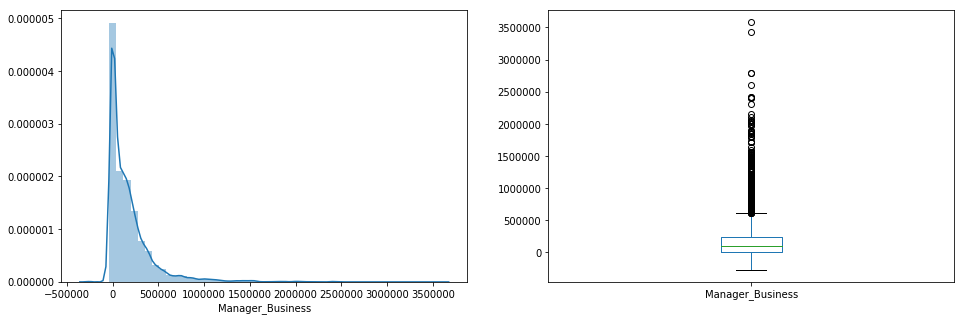

In [69]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Manager_Business']);

plt.subplot(122)
train['Manager_Business'].plot.box(figsize=(16,5))

plt.show()

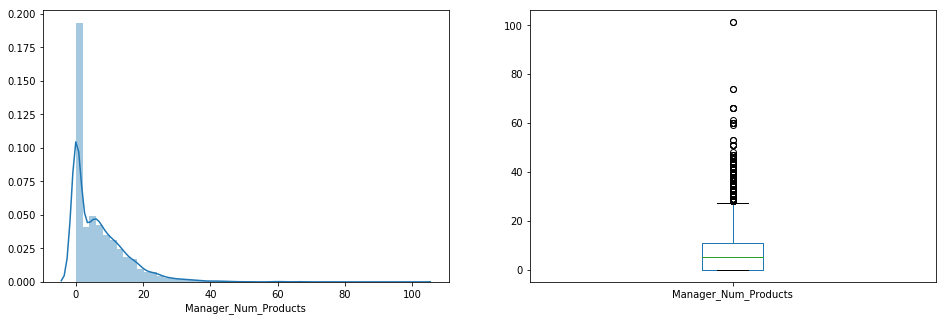

In [70]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Manager_Num_Products']);

plt.subplot(122)
train['Manager_Num_Products'].plot.box(figsize=(16,5))

plt.show()

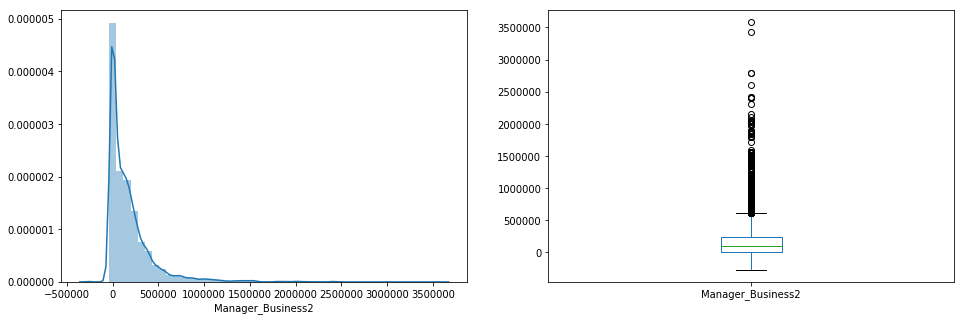

In [71]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Manager_Business2']);

plt.subplot(122)
train['Manager_Business2'].plot.box(figsize=(16,5))

plt.show()

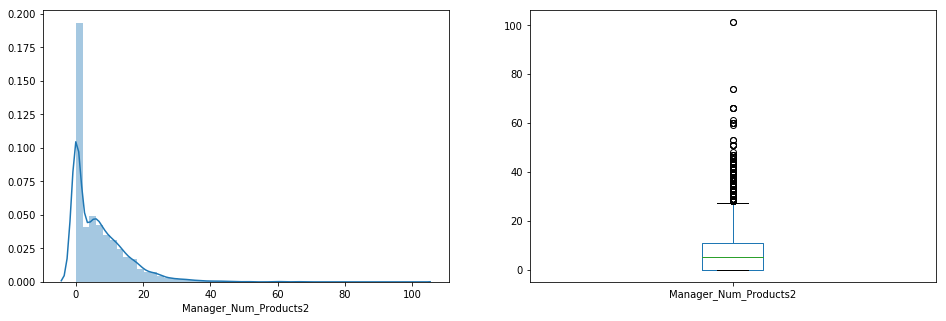

In [72]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Manager_Num_Products2']);

plt.subplot(122)
train['Manager_Num_Products2'].plot.box(figsize=(16,5))

plt.show()

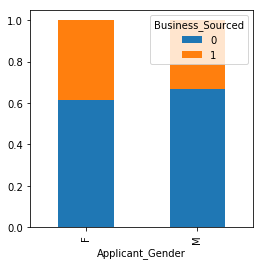

In [75]:
AG=pd.crosstab(train['Applicant_Gender'],train['Business_Sourced'])
AG.div(AG.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

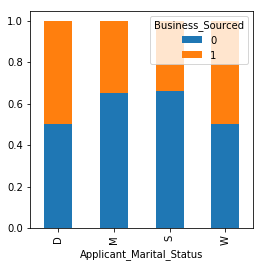

In [79]:
AM=pd.crosstab(train['Applicant_Marital_Status'],train['Business_Sourced'])
AM.div(AM.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

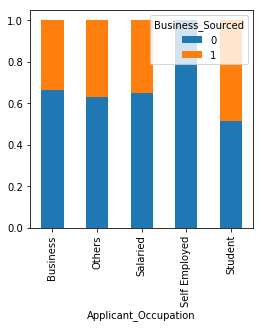

In [80]:
AO=pd.crosstab(train['Applicant_Occupation'],train['Business_Sourced'])
AO.div(AO.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

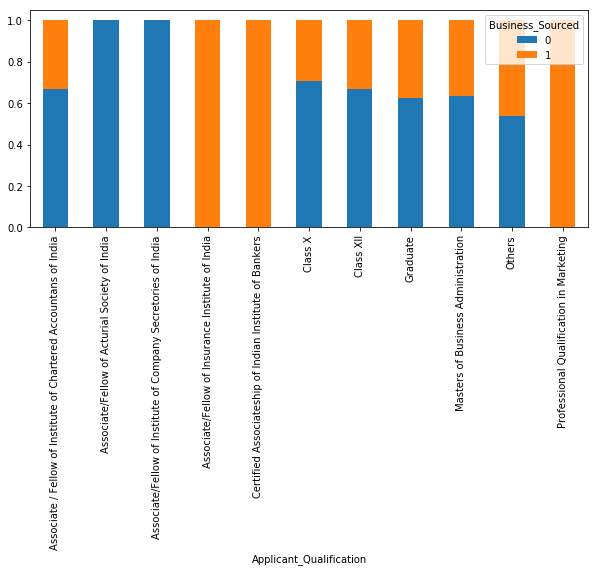

In [82]:
AQ=pd.crosstab(train['Applicant_Qualification'],train['Business_Sourced'])
AQ.div(AQ.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))

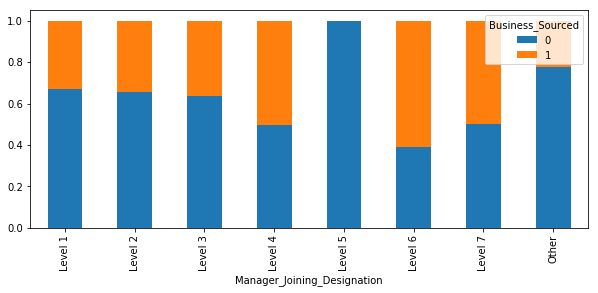

In [83]:
MJD=pd.crosstab(train['Manager_Joining_Designation'],train['Business_Sourced'])
MJD.div(MJD.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))

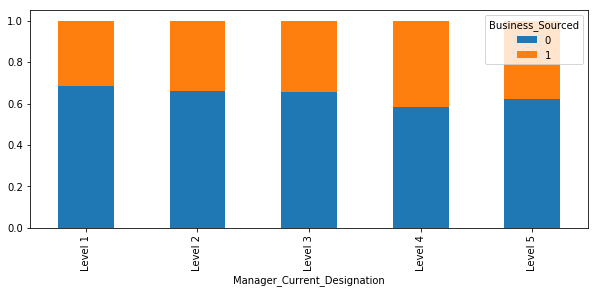

In [84]:
MCD=pd.crosstab(train['Manager_Current_Designation'],train['Business_Sourced'])
MCD.div(MCD.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))

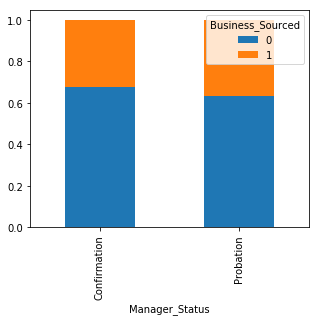

In [86]:
MS=pd.crosstab(train['Manager_Status'],train['Business_Sourced'])
MS.div(MS.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,4))

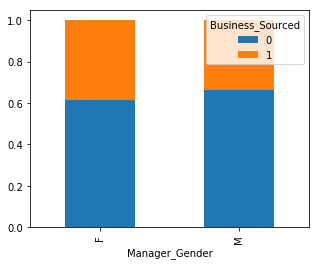

In [87]:
MG=pd.crosstab(train['Manager_Gender'],train['Business_Sourced'])
MG.div(MG.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,4))

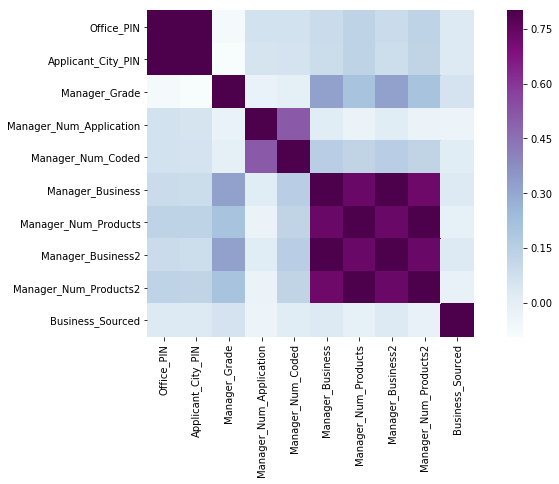

In [89]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");